In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # use seaborn styles
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# groupby 
titanic.groupby('sex')['survived'].mean()
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [9]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [52]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())  # fillna
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

In [58]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])  # multilevel table

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  

In [60]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)  # all totals

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [63]:
# load data with curl 
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
births = pd.read_csv('births.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   271k      0 --:--:-- --:--:-- --:--:--  271k


,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
5,1969,1,3,M,4994
6,1969,1,4,F,4440
7,1969,1,4,M,4520
8,1969,1,5,F,4192
9,1969,1,5,M,4198


In [69]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


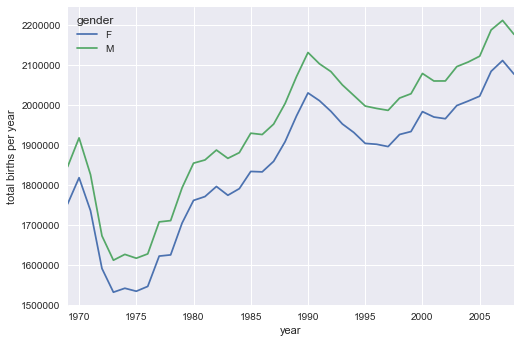

In [75]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [83]:
# remove these outliers via robust sigma-clipping 5 sigm
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.7413 * (quartiles[2] - quartiles[0])  # IQR * 0.7413
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

In [87]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births.dayofweek.value_counts()

5    2088
4    2088
3    2088
2    2088
6    2086
1    2086
0    2086
Name: dayofweek, dtype: int64

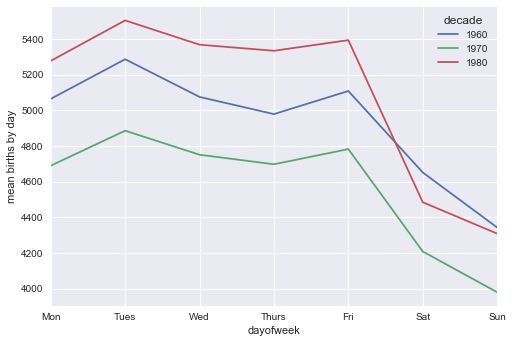

In [92]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

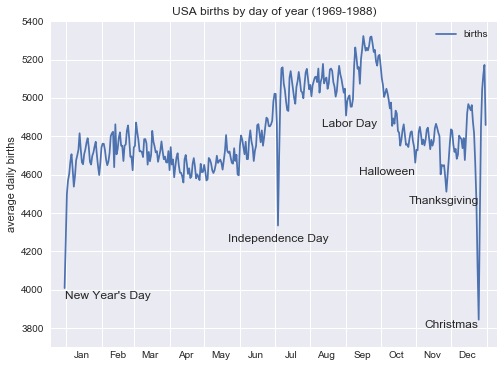

In [95]:
dates = [pd.datetime(2012, month, day) for (month, day) in zip(births['month'], births['day'])]

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
births.pivot_table('births', dates).plot(ax=ax)

# Label the plot
ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day", ha='center')
ax.text('2012-9-4', 4850, "Labor Day", ha='center')
ax.text('2012-10-31', 4600, "Halloween", ha='right')
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3800, "Christmas", ha='right')
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births',
       xlim=('2011-12-20','2013-1-10'),
       ylim=(3700, 5400));

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

In [111]:
# 2008/2012/2016 - just random leap year 
# year is not important in this case
dates = [pd.datetime(2008, month, day) for (month, day) in zip(births['month'], births['day'])]
births.pivot_table('births', dates)

,births
2008-01-01,4009.225
2008-01-02,4247.400
2008-01-03,4500.900
2008-01-04,4571.350
2008-01-05,4603.625
2008-01-06,4668.150
2008-01-07,4706.925
2008-01-08,4629.650
2008-01-09,4537.775
2008-01-10,4591.700
